<a href="https://colab.research.google.com/github/seodalzzz/ESAA/blob/HandsOn_Machine_Learning/HandsOnML_CHAP4_Model_Training_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CHAP4. 모델 훈련**


In [1]:
import matplotlib.pyplot as plt

모델을 훈련하는 두가지 방법
- best parameter를 해석적으로 구하기
- 경사하강법 이용

##**1. 선형 회귀**


* 모델을 훈련시킨다 = 모델이 훈련세트에 가장 잘 맞도록 모델 파라미터를 설정한다

* Minimize RMSE(평균 제곱근 오차)
  * RMSE를 최소화하는 파라미터 찾기

###1) 정규방정식
비용함수를 최소화하는 파라미터를 찾기 위한 해석적인 방법

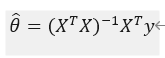

* Theta hat : 비용 함수를 최소화하는 theta

* 공식 test

In [2]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [3]:
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.43995756],
       [3.24142268]])

> random noise 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함

In [5]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # 모든 샘플에 X0=1을 추가
y_predict=X_new_b.dot(theta_best)
y_predict

array([[3.43995756],
       [9.92280293]])

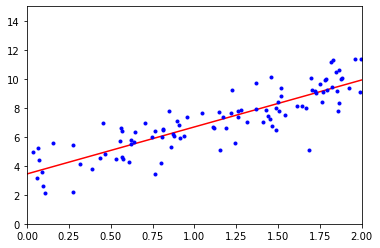

In [6]:
plt.plot(X_new,y_predict,"-r")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

* 사이킷런에서 선형 회귀 수행

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)
print(lin_reg.predict(X_new))


[3.43995756] [[3.24142268]]
[[3.43995756]
 [9.92280293]]


* LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 함
  * thetahat=(유사역행렬(무어-펜로즈역행렬)과 y의 행렬곱)을 구함

In [8]:
theta_Best_svd, residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_Best_svd

array([[3.43995756],
       [3.24142268]])

In [9]:
# 무어-펜로즈 역행렬 계산
np.linalg.pinv(X_b).dot(y)

array([[3.43995756],
       [3.24142268]])

* 유사역행렬은 SVD를 통해 구해짐
  * m<n이거나 어떤 특성이 중복되어 행렬 t(X)X의 역행렬이 없다면 정규방정식이 작동하지 않음 > 유사역행렬이 더 용이함

###2) 계산 복잡도

* 정규방정식은 (n+1)*(n+1) 행렬(t(X)X)의 역행렬을 계산해야 함

* 사이킷런의 LinearRegression 클래스가 사용하는 SVD방법은 O(n^2)

##**2.경사하강법**


비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

파라미터 벡터에 대해 비용함수의 현재 그래디언트를 계산 > 그래디언트가 감소하는 방향으로 진행 > 그래디언트가 0이 되면 최솟값에 도달한 것

임의의 파라미터 벡터로 시작해서 한번에 조금씩 비용함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할때까지 점진적으로 향상시킴

학습률 파라미터 설정 필요 

문제점
  * global minimum이 아닌 local minimum에 수렴할 수 있음
  * 기울기가 0에 가까운 지역이 존재한다면 global minimum에 도달하기까지 시간이 오래걸리거나 도달하지 못할 수 있음

선형 회귀를 위한 MSE 비용 함수는 볼록함수 > 하나의 global minimum만 존재

모델 훈련은 파라미터공간에서 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 것

###1) 배치 경사 하강법


경사 하강법을 구현하려면 각 모델 파라미터에 대해 비용 함수의 그래디언트를 계산해야 함 (편도함수 계산 필요)

편도함수를 각각 계산하는 대신 그래디언트 벡터를 이용해 한꺼번에 계산 가능
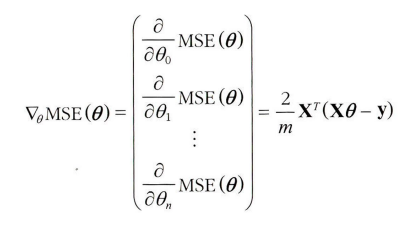

배치 경사 하강법 : 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산

위로 향하는 그래디언트 벡터가 구해지면 반대 방향인 아래로 가야 함
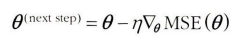

In [10]:
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-eta*gradients

In [11]:
theta

array([[3.43995756],
       [3.24142268]])

적절한 학습률을 찾기 위해 그리드 탐색을 이용
  * 너무 오래 걸리는 모델을 막기 위해 반복 횟수 제한 필요
  * 반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면 알고리즘을 중지

###2) 확률적 경사 하강법

배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산하기 때문에 훈련 세트가 커지면 매우 느려짐

확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택 > 하나의 샘플에 대한 그래디언트를 계산

장점
  * 빠르고 매우 큰 훈련세트도 훈련시킬 수 있음 (메모리 절약 가능)
  * 비용 함수가 매우 불규칙할 경우 local minimum을 건너뛰도록 도와 배치 경사 하강법보다 global minimum을 찾을 가능성이 높음

단점
  * 무작위적이기 때문에 비용 함수가 위아래로 요동치면서 평균적으로 감소함 > 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아님

학습률을 점진적으로 감소시키기
  * 시작할 때는 큰 학습률  > local minimum에 빠지지 않고 수렴이 빠름
  * 점차 학습률을 줄임 > 알고리즘이 global minimum에 수렴하게 함

학습 스케줄 : 매 반복에서 학습률을 결정하는 함수
  * 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈출 수 있음
  * 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지할 수 있음



In [12]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients


In [13]:
theta

array([[3.51696892],
       [3.14249225]])

사이킷런 : SGDRegressor 클래스 사용

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.47522514]), array([3.35186783]))

###3) 미니배치 경사 하강법

미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산

확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상

미니배치를 어느정도 크게 하면 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임

##**3. 다항 회귀**

비선형 데이터를 학습하는 데 선형 모델을 사용
  * 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련

In [16]:
# 비선형 데이터 생성
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

* PolynomialFeatures 사용
  * 주어진 차수까지 feature 간의 모든 교차항을 추가 > 특성 사이의 관계를 찾을 수 있음
  * 특성이 n개인 배열을 특성이 (n+d)!/d!n! 인배열로 변환함

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.24960779]
[-2.24960779  5.06073519]


> X_poly는 원래 특성 X와 이 특성의 제곱을 포함함

In [18]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99897824]), array([[0.98819236, 0.49391994]]))

##**4. 학습 곡선**


고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련데이터에 잘 맞추려 함 >> overfitting

어떻게 모델이 데이터에 과대적합 또는 과소적합되었는지 알 수 있을까?

* 교차검증 이용
  * 훈련 데이터에서 성능이 좋지만 교차검증 점수가 나쁘다면 과대적합
  * 훈련데이터, 교차검증 점수가 모두 나쁘다면 과소적합

* 학습 곡선
  * 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸 그래프
  * 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
  train_errors,val_errors=[],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict=model.predict(X_train[:m])
    y_val_predict=model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="훈련세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증세트")

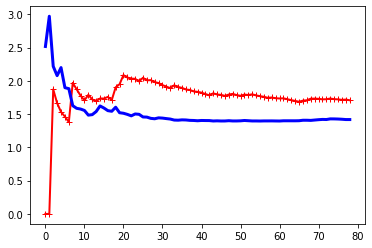

In [20]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

> 과소적합

> 모델이 훈련 데이터에 과소적합되어있다면 훈련 샘플을 더 추가해도 효과X > 더 복잡한 모델을 사용하거나 더 나은 피처를 선택해야 함

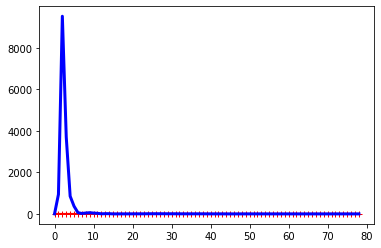

In [21]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg", LinearRegression()),

])

plot_learning_curves(polynomial_regression,X,y)

> 훈련데이터의 오차가 선형 회귀 모델보다 훨씬 낮음

> 과대적합을 개선하는 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가

* 편향/분산 트레이드오프

모델의 일반화 오차는 세가지 다른 종류의 오차의 합으로 표현할 수 있다
  * 편향 : 잘못된 가정으로 인한 것. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움

  * 분산 : 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남 . 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있음

  * 줄일 수 없는 오차 : 데이터 자체에 있는 잡음 때문에 발생 

모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어듦.

##**5. 규제가 있는 선형 모델**


모델을 규제하여 과대적합을 감소시킴 (자유도 줄이기)

선형 회귀 모델에서는 모델의 가중치를 제한하여 모델을 규제 

###1) 릿지 회귀

규제가 추가된 선형 회귀

비용함수에 규제항 추가 > 모델의 가중치가 가능한 한 작게 유지됨

loss(theta)=MSE(theta)+alpha*0.5*sum(theta^2)

규제항은 훈련시에만 적용

+@ 일반적으로 훈련에서 사용하는 성능 지표는 미분가능해야하기 때문에 훈련과 테스트에서 사용되는 성능지표가 다름

릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행 전에 데이터의 스케일을 맞추는 것이 중요함

In [22]:
#정규방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[5.05631326]])

In [23]:
#SGD 사용한 릿지 회귀
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.0526342])

###2)라쏘회귀

비용 함수에 규제항을 더함

loss(theta)=MSE(theta)+alpha*sum(abs(theta))

덜 중요한 특성의 가중치를 제거하려고 노력함 > 자동으로 특성 선택을 하고 희소 모델을 만듦.

라쏘의 비용함수는 theta=0 일때 미분 불가능 > 서브그래디언트 벡터 사용

In [24]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.01395602])

Lasso 대신 SGDRegressor(penalty="l1") 을 사용할 수도 있음

###3) 엘라스틱넷

릿지 회귀와 라쏘 회귀의 절충안

릿지와 라쏘의 규제항을 더해 규제항으로 사용, 혼합 정도는 혼합 비율을 사용하여 조절

일반적으로 평범한 선형회귀보다는 규제를 적용하는 것이 좋음
  * 릿지가 기본이 되지만 쓰이는 항이 몇개뿐이라고 의심되면 라쏘나 엘라스틱넷 사용
  * 특성 수가 훈련 샘플 수보다 많거나 특성 몇개의 상관관계가 뚜렷할 경우 보통 라쏘가 문제를 일으키므로 엘라스틱넷 사용

In [25]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.01523172])

###4) 조기종료

조기종료 : 검증 에러가 최솟값에 도달하면 훈련을 중지

SGD나 미니배치 경사 하강법에서는 곡선이 그리 매끄럽지 않아 최솟값에 도달했는지 확인하기 어려울 수 있음. > 검증 에러가 일정 시간동안 최솟값보다 클 때 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌림

In [26]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#데이터 준비
poly_scaler=Pipeline([
    ("poly_features",PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler",StandardScaler())
])
X_train_poly_sclaed=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.transform(X_val)

sgd_reg=SGDRegressor(max_iter=1,tol=-np.infty, warm_Start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error=float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict=sgd_reg.predict(X_val_poly_scaled)
  val_error=mean_squared_error(y_val,y_val_predict)
  if val_error<minimum_val_error:
    minimum_val_error=val_error
    best_epoch=epoch
    best_model=clone(sgd_reg)


NameError: ignored

##**6. 로지스틱 회귀**

샘플이 특정 클래스에 속할 확률을 추정하는데 사용

어떤 클래스에 대한 샘플의 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측

###1) 확률 추정

입력 특성의 가중치 합을 계산 > 결괏값의 로지스틱을 출력

시그모이드 함수
  * f(x)=1/(1+exp(-x))

###2) 훈련과 비용 함수

양성 샘플에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 찾기

###3) 결정 경계


In [27]:
# 꽃잎의 너비를 기반으로 Iris 종을 감지하는 분류기
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
X=iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [30]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

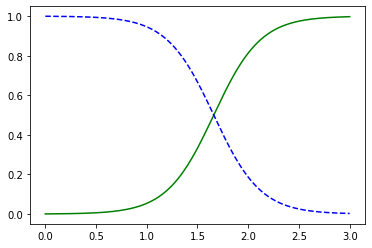

In [31]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-",label="Iris virginica")
plt.plot(X_new,y_proba[:,0], "b--", label="Not Iris virginica")

In [32]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

로지스틱 회귀 모델도 l1, l2 패널티를 사용하여 규제 가능

###4) 소프트맥스 회귀

로지스틱 회귀 모델은 다중 클래스를 지원하도록 일반화될 수 있음

샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 s(x)를 계산하고 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정함

각 클래스는 개별 파라미터 벡터를 가짐

소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택함

소프트맥스 회귀 분류기는 한번에 하나의 클래스만 예측함 (다중출력X)



In [33]:
X=iris["data"][:,(2,3)]
y=iris["target"]

softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [35]:
softmax_reg.predict([[5,2]])


array([2])

In [36]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

추정 확률 50% 이하인 클래스를 예측할 수도 있음